# Bright Academy Student Analysis and Grade Predicition

#### Problem Definition :
BrightPath Academy has a problem identifing at risk students early enough, which hinders their ablity to provide personalized support to students on time.Although they have collected data on their students. This data includes various aspects of the students life that could be affecting their performance in class, like extracurricular activites, parental involvment academic performance, study habits and more.However they lack the insights about the data to help solve this problem

#### Hypothesis : 
1. Students with lower study hours  will have lower GPAS 
2. Students with low to none parental involvment will have lower GPS's on average 
3. Students with Higher Absences will have lower GPA's on average
4. Students engaging in tutuoring will have a higher average than those who are not 
`add more if you can think of them` 

### Features of data : 
- Student Information
- -  StudentID: A unique identifier assigned to each student (1001 to 3392).

- Demographic details
    - Age: The age of the students ranges from 15 to 18 years.
    - Gender: Gender of the students, where 0 represents Male and 1 represents Female.
    - Ethnicity: The ethnicity of the students, coded as follows:
        - 0: Caucasian
        - 1: African American
        - 2: Asian
        - 3: Other

- ParentalEducation: The education level of the parents, coded as follows:
    - 0: None
    - 1: High School
    - 2: Some College
    - 3: Bachelor's
    - 4: Higher Study

- Study Habits
    - StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
    - Absences: Number of absences during the school year, ranging from 0 to 30.
    - Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

- Parental Involvement
    - ParentalSupport: The level of parental support, coded as follows:
        - 0: None
        - 1: Low
        - 2: Moderate
        - 3: High
        - 4: Very High

- Extracurricular Activities
    - Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
        - Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
        - Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
        - Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates
Yes.

- Academic Performance
    - GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits,
parental involvement, and extracurricular activities.

- Target Variable: Grade Class
    - GradeClass: Classification of students' grades based on GPA:
        - 0: 'A' (GPA >= 3.5)
        - 1: 'B' (3.0 <= GPA < 3.5)
        - 2: 'C' (2.5 <= GPA < 3.0)
        - 3: 'D' (2.0 <= GPA < 2.5) 
        - 4: 'F' (GPA < 2.0)

In [1]:
# importing all the revelant tools we'll need throughout the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the Data 

df = pd.read_csv('../data/Student_performance_data .csv') ## df stands for dataframe created using pandas
df.head(20) ## showing the first 10 rows in the data frame.  


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


In [2]:

def calculate_grade_class(gpa):
    if gpa >= 3.5:
        return 0  # 'A'
    elif 3.0 <= gpa < 3.5:
        return 1  # 'B'
    elif 2.5 <= gpa < 3.0:
        return 2  # 'C'
    elif 2.0 <= gpa < 2.5:
        return 3  # 'D'
    else:
        return 4  # 'F'

df['GradeClass'] = df['GPA'].apply(calculate_grade_class)
df['GradeClass'].head(20)

0     2
1     1
2     4
3     3
4     4
5     1
6     2
7     4
8     2
9     0
10    3
11    4
12    4
13    4
14    3
15    4
16    3
17    4
18    4
19    3
Name: GradeClass, dtype: int64

## Understanding the Data 
- We'll start by getting  basic information about the data usnig some methods prevelant in the pandas library. 


In [3]:
display(df.info())
df.drop(columns='StudentID',inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 KB


None

In [4]:
df.describe().T ## gettins some descriptive statistics about the data

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000
Sports,2392.0,0.303512,0.459870,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
df.isna().sum() ## checking if any of the columns are null so we can think about how to tackle them further down in the notebook 

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [6]:
df_grouped = df.groupby('GradeClass').mean()

df_grouped['GradeClass'] = df_grouped.index

df_Zero = df[df['GradeClass'] == 0.0]
df_Zero.describe()

##  Something wrong with grade class. 

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.00000,77.000000,77.000000,77.000000,77.000000,77.0
mean,16.519481,0.532468,0.961039,1.623377,12.891884,1.597403,0.584416,2.818182,0.61039,0.441558,0.272727,0.142857,3.682370,0.0
std,1.107515,0.502217,1.018791,0.903778,5.056855,1.822807,0.496054,1.022475,0.49086,0.499829,0.448282,0.352222,0.165340,0.0
min,15.000000,0.000000,0.000000,0.000000,1.317843,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.503743,0.0
25%,16.000000,0.000000,0.000000,1.000000,9.285447,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,3.548460,0.0
50%,16.000000,1.000000,1.000000,2.000000,13.546079,1.000000,1.000000,3.000000,1.00000,0.000000,0.000000,0.000000,3.603508,0.0
75%,18.000000,1.000000,2.000000,2.000000,17.442121,3.000000,1.000000,4.000000,1.00000,1.000000,1.000000,0.000000,3.812757,0.0
max,18.000000,1.000000,3.000000,4.000000,19.885760,9.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000,4.000000,0.0


## Exploratory Data Analysis
- We'll be explore the date in the following ways 
    - univariate analysis ( exploring 1 variable at a time )
    - bivariate analysis ( exploring 2 variables at a time )
    - using plots to visualize relationships between variables to find some sort of patterns before modelling


<Axes: xlabel='GradeClass'>

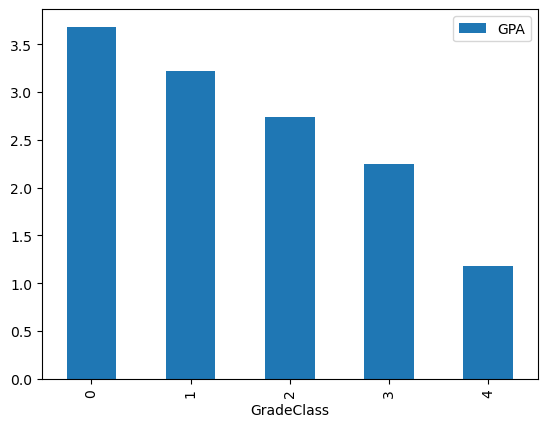

In [7]:
## Start EDA FROM HERE 
## eda should answer all the hypthoses questions by creating graphs or using comparisons between avereags, sums, counts etc. 
df_grouped = df.groupby('GradeClass').mean()

df_grouped['GradeClass'] = df_grouped.index

df_Zero = df[df['GradeClass'] == 0.0]
df_grouped.plot.bar(x='GradeClass',y='GPA')

##  Something wrong with grade class I think. 



Text(0.5, 1.0, ' Number of students at each Age group')

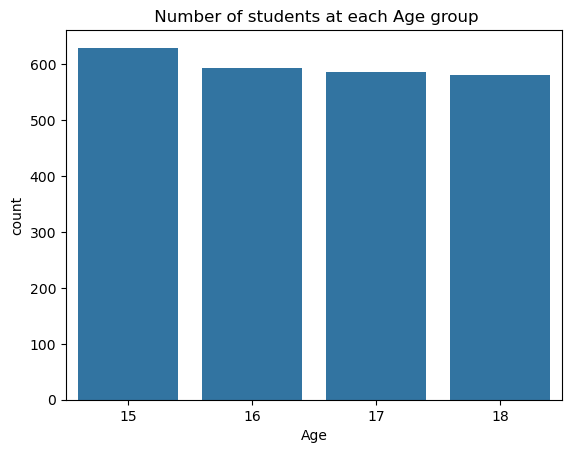

In [8]:
sns.countplot(data=df,x='Age')
plt.title(' Number of students at each Age group')

In [9]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


Text(0.5, 1.0, 'Box and Whisker plot of Parental Support ')

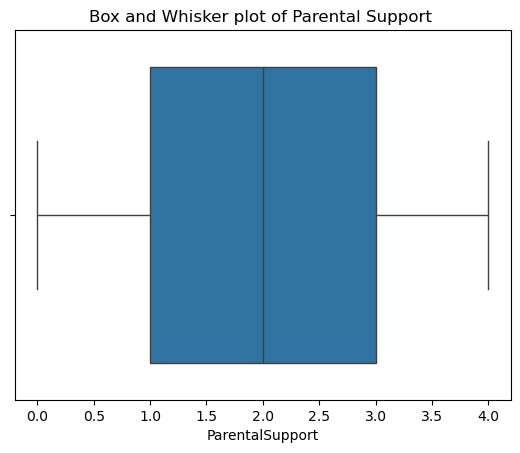

In [10]:
sns.boxplot(data=df,x='ParentalSupport')
plt.title('Box and Whisker plot of Parental Support ')

Text(0, 0.5, 'Number of occurences')

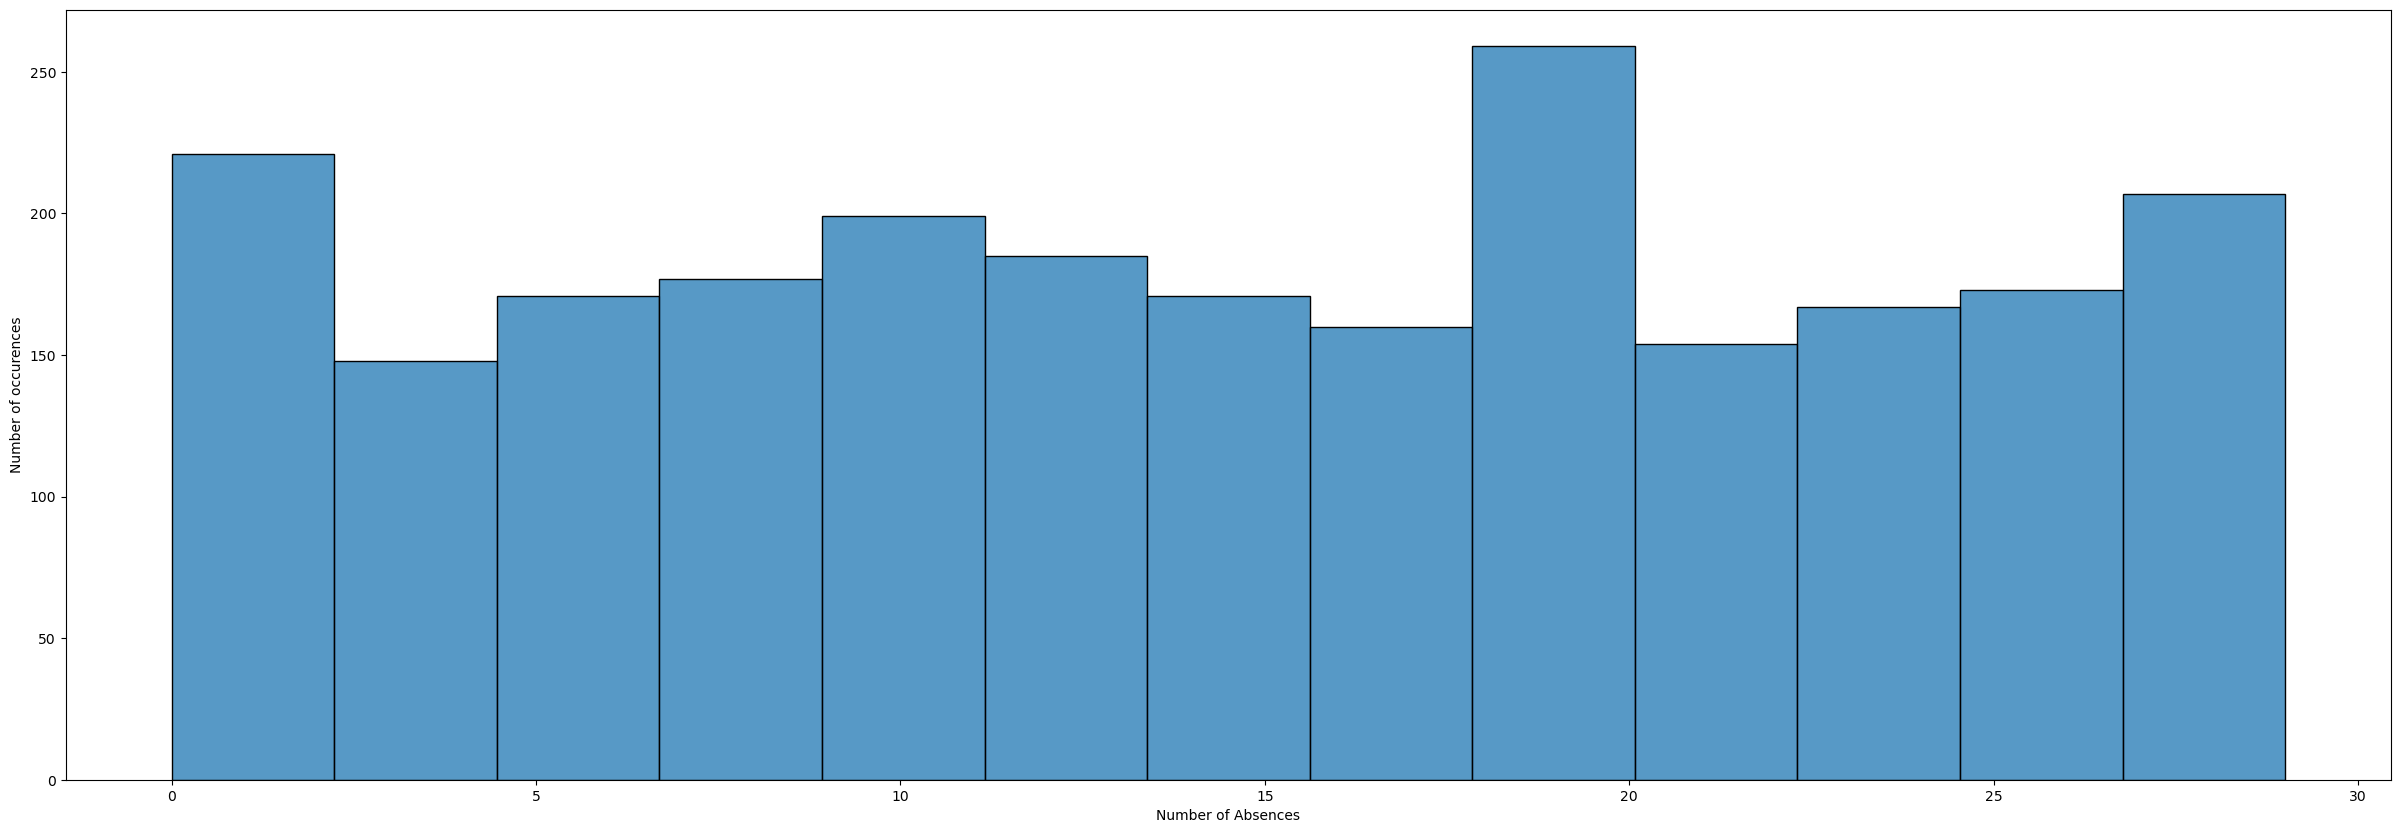

In [11]:

fig,ax = plt.subplots(figsize =(30,10))
ax = sns.histplot(data=df,x='Absences')
plt.title
ax.set_xlabel('Number of Absences')
ax.set_ylabel('Number of occurences')


<Axes: xlabel='GPA', ylabel='Density'>

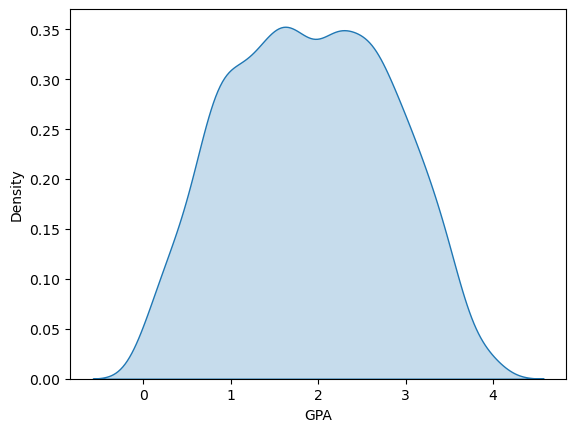

In [12]:
sns.kdeplot(data=df,x='GPA',fill=True,legend=True   )

Text(0.5, 1.0, 'Violin Plot showing the distribution of parental education')

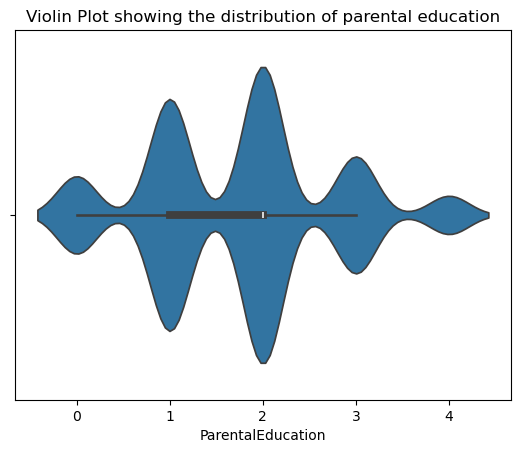

In [13]:
sns.violinplot(data=df,x='ParentalEducation')
plt.title('Violin Plot showing the distribution of parental education')

Text(0.5, 1.0, 'Pie chart showing Gender Distribution')

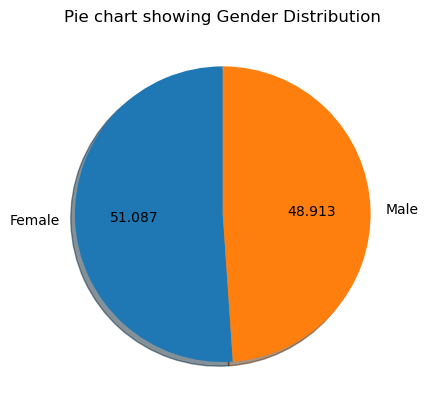

In [14]:
gender = df['Gender']
plt.pie(gender.value_counts(),startangle=90,autopct='%.3f',labels=['Female','Male'],shadow=True)
plt.title('Pie chart showing Gender Distribution')

In [15]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


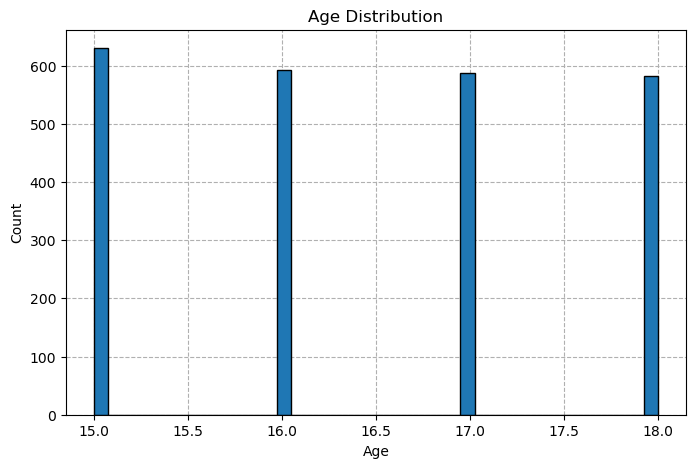

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))
_ = plt.hist(df["Age"], bins=40, edgecolor='black', linewidth=1)
plt.grid(linestyle="--", zorder=0)
plt.gca().set_axisbelow(True)  # Ensure grid lines are drawn below the bars
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

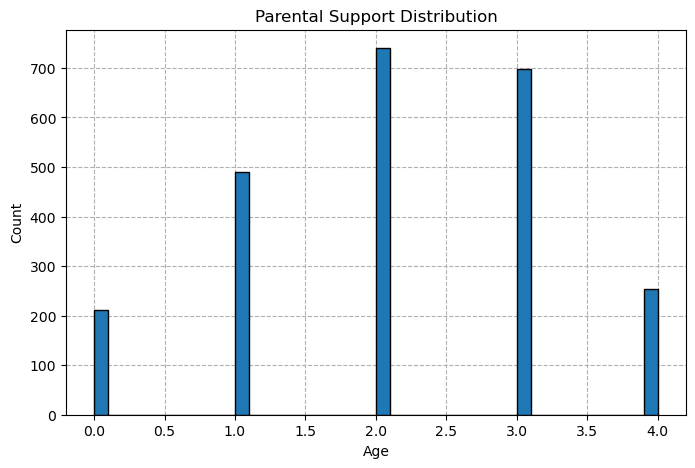

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
_ = plt.hist(df["ParentalSupport"], bins=40, edgecolor='black', linewidth=1)
plt.grid(linestyle="--", zorder=0)
plt.gca().set_axisbelow(True)  # Ensure grid lines are drawn below the bars
plt.title("Parental Support Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## Bivariate Analysis

In [18]:
df.head(20) ## Call this multiple times to see the data we can remove duplicate instances after revision.

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4
5,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1
6,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2
7,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4
8,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2
9,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0


Text(0.5, 1.0, 'Bar char showing the relationship between parental education and tutoring')

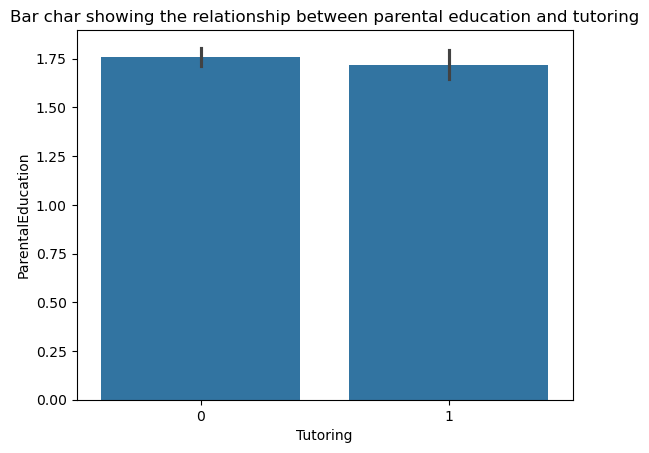

In [19]:
sns.barplot(data=df,x='Tutoring',y='ParentalEducation')
plt.title('Bar char showing the relationship between parental education and tutoring')

Text(0.5, 1.0, 'Line graph showing the relationship between absences and GPA')

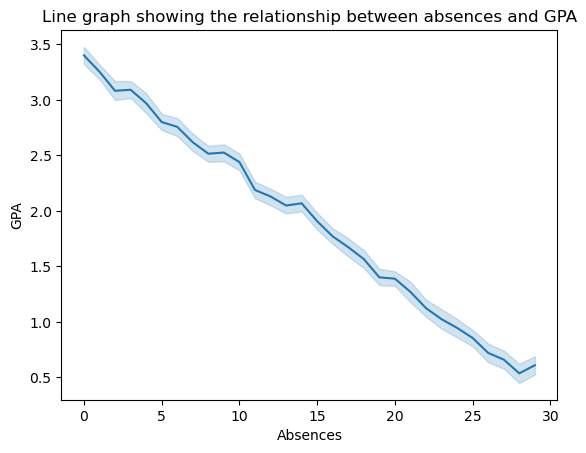

In [20]:
sns.lineplot(data=df,x='Absences',y='GPA')
plt.title('Line graph showing the relationship between absences and GPA')

<Axes: xlabel='StudyTimeWeekly', ylabel='GPA'>

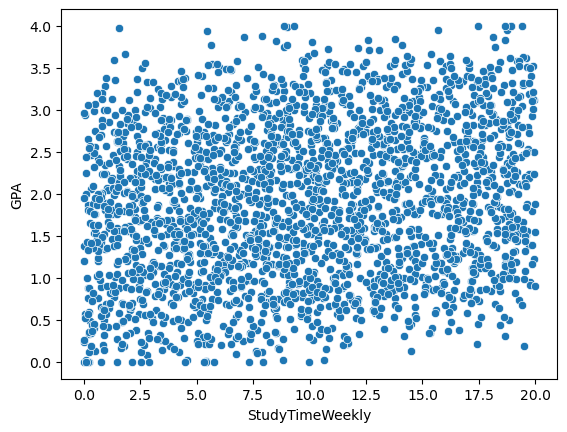

In [21]:
sns.scatterplot(data=df,x='StudyTimeWeekly',y='GPA')


Text(0.5, 1.0, 'Bar plot showing Absences against parental Support')

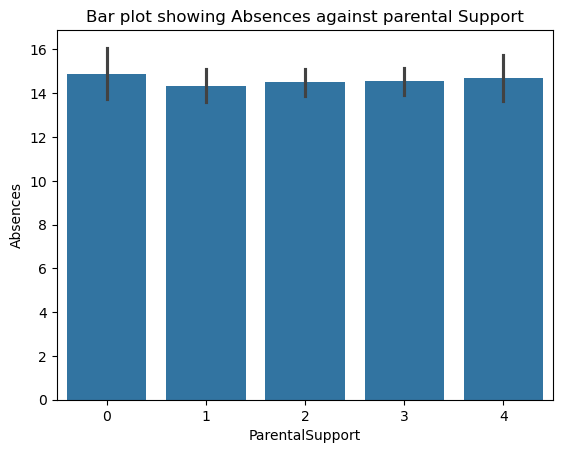

In [22]:
sns.barplot(data=df,x='ParentalSupport',y='Absences')
plt.title('Bar plot showing Absences against parental Support')

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,1
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,1
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,4
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,4


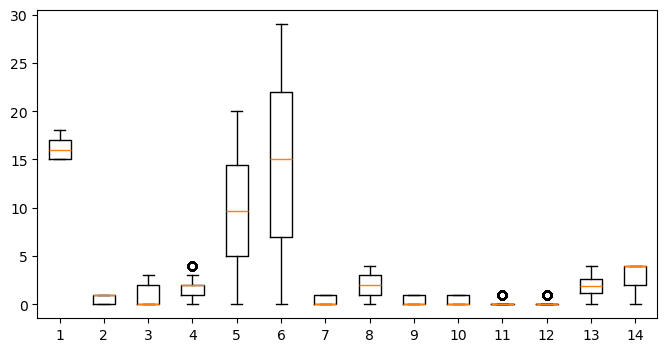

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.boxplot(df)
df

In [24]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


## Missing value and Outlier Treatment 

In [25]:
## Handle missing values and outliers from here
df.isna().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [26]:
## Removing unncessary columns 
df.drop(columns='StudentID',inplace=True)

KeyError: "['StudentID'] not found in axis"

## Feature engineering

In [33]:
## handle  faeture engineering from here 

## Model Building: Part 1 Model Building: Part 1 (Apply baseline machine learning classification algorithms:
Logistic Regression, Random Forest, and XGBoost with step 8)

In [34]:
## from here 

from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

def train_models(X_train, X_test, Y_train, Y_test,models=None,):
    '''
    This function will take in multiple models to train them at base to see which method gives the highest score.
    '''
    model_info = {}

    for model in models:
        model.fit(X_train,Y_train)
        y_preds = model.predict(X_test)
        model_score = accuracy_score(Y_test,y_preds)
        model_info[model.__class__.__name__] = model_score

    return model_info


X = df.drop(['GradeClass'],axis=1)
Y = df['GradeClass']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

models = [RandomForestClassifier(random_state=42),KNeighborsClassifier(n_neighbors=5),LogisticRegression(random_state=42,max_iter=100),GradientBoostingClassifier(random_state=42)] ## were picked 

print(train_models(X_train, X_test, Y_train, Y_test,models))

## Models to try : Logistic reg, Decision Tree Classifier, Random forest,SVM,KNN,

c:\Users\thape\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.9916492693110647, 'KNeighborsClassifier': 0.755741127348643, 'LogisticRegression': 0.8517745302713987, 'GradientBoostingClassifier': 1.0}


## After using the model method to train 4 different classification models we'll explore the highest 2 
1. GradientBoostingClassifier(100%)
2. Random forest Classifer(99%)




## Evlauation, cross comparison and metrics

In [35]:
## cross validation scores to ensure they work consistently. This cross validates the score by scoring different sets of X and Y over 5 folds ( default)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,Y_train) 
cv_scores = cross_val_score(rf,X,Y,cv=5,scoring='accuracy')
print(f"Cross validation Accuracy for Random forest : {cv_scores.mean()}")

gdb = GradientBoostingClassifier(random_state=42)
gdb.fit(X_train,Y_train)
cv_scores = cross_val_score(gdb,X,Y,cv=5)
print(f"Cross validation Accuracy for Gradient Boosting : {cv_scores.mean()}")

## After evaluating their cross-valdiation scores both models still achieved high scores with little drop off


Cross validation Accuracy for Random forest : 0.9916379137149397
Cross validation Accuracy for Gradient Boosting : 0.998744769874477


In [36]:
## Feature importance 

feature_importance_rf = pd.DataFrame({
    'features':X.columns,
    'Importance':rf.feature_importances_
    })

feature_importance_rf.sort_values(by='Importance',ascending=False)
feature_importance_rf

,features,Importance
0,Age,0.014784
1,Gender,0.007255
2,Ethnicity,0.012512
3,ParentalEducation,0.014802
4,StudyTimeWeekly,0.047493
5,Absences,0.257868
6,Tutoring,0.008918
7,ParentalSupport,0.022257
8,Extracurricular,0.008611
9,Sports,0.007350


<Figure size 800x600 with 0 Axes>

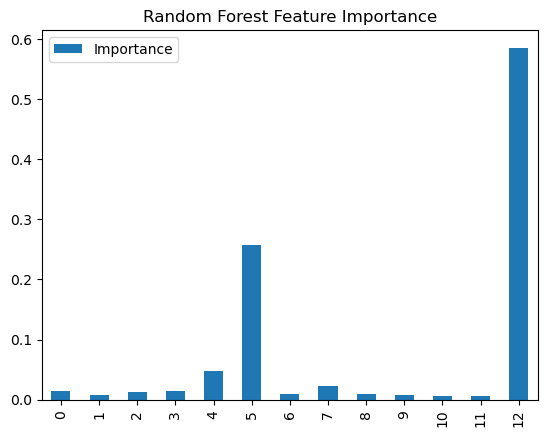

In [37]:
plt.figure(figsize=(8, 6))
feature_importance_rf.plot.bar()
plt.title('Random Forest Feature Importance')
plt.show()

In [38]:
feature_importance_gb = pd.DataFrame({
    'features':X.columns,
    'Importance':gdb.feature_importances_
    })

feature_importance_gb.sort_values(by='Importance',ascending=False)
feature_importance_gb

,features,Importance
0,Age,0.000000e+00
1,Gender,0.000000e+00
2,Ethnicity,0.000000e+00
3,ParentalEducation,0.000000e+00
4,StudyTimeWeekly,2.034475e-15
5,Absences,6.009956e-19
6,Tutoring,0.000000e+00
7,ParentalSupport,0.000000e+00
8,Extracurricular,0.000000e+00
9,Sports,3.038651e-17


<Figure size 800x600 with 0 Axes>

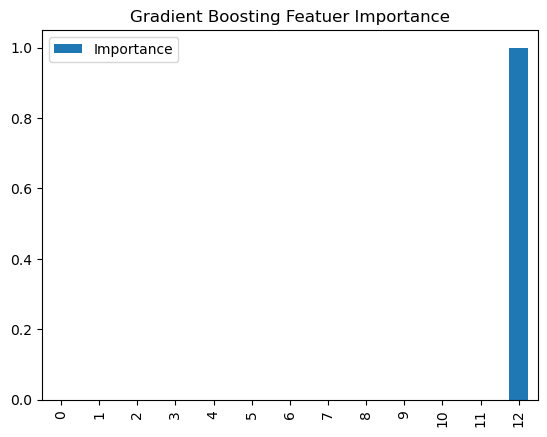

In [39]:
plt.figure(figsize=(8, 6))
feature_importance_gb.plot.bar()
plt.title('Gradient Boosting Featuer Importance')
plt.show()
 ## from here we can see that the model is 100% relining on the gpa to make a prediction unlike Random forest which still favours GPA as the most important feature but takes other features into consideration as well.
 

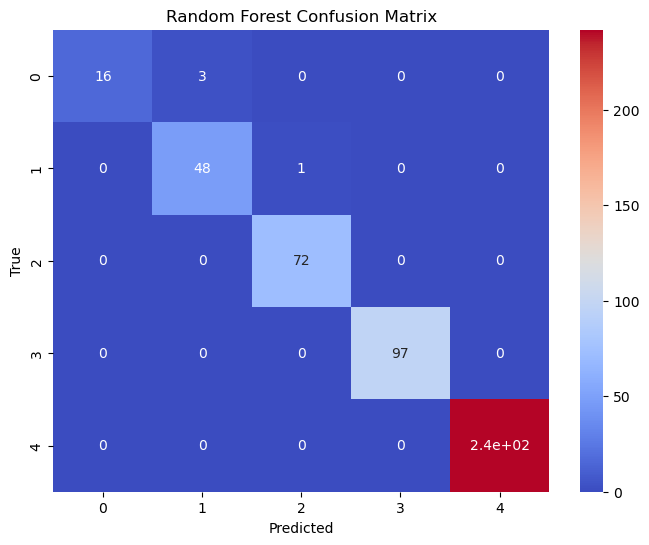

[3 2 4 4 2 1 4 2 2 4 0 4 4 3 4 4 1 4 4 3 1 3 4 4 4 3 3 3 4 1 2 4 3 1 4 4 4
 3 3 4 2 3 3 4 4 4 0 1 3 4 1 0 4 2 1 3 4 4 3 4 4 2 2 4 3 3 4 4 2 2 2 4 4 3
 4 4 3 4 4 4 3 4 0 4 3 4 4 4 4 4 2 4 3 2 4 1 4 1 3 3 1 4 3 4 4 0 4 4 4 3 4
 0 3 3 4 0 2 4 4 0 2 1 2 2 4 1 4 1 4 4 4 4 2 1 3 2 4 4 4 4 3 4 3 4 1 4 4 2
 4 2 4 4 4 4 4 1 4 3 3 4 2 4 3 4 1 1 4 3 4 2 1 2 3 3 2 3 2 1 4 4 4 4 0 3 0
 2 4 4 4 3 4 4 4 4 4 3 1 2 4 3 4 3 4 4 4 2 4 4 3 3 4 4 4 4 4 4 4 2 3 3 4 2
 4 2 4 4 2 4 3 2 4 2 3 3 3 1 4 1 4 4 2 2 2 2 4 3 2 3 4 1 4 4 2 4 4 3 4 4 4
 4 2 4 4 4 1 4 2 3 4 2 0 4 4 2 4 4 1 4 2 4 1 3 2 4 0 4 2 2 2 1 3 3 4 4 2 1
 4 4 2 4 4 4 4 4 2 1 4 4 1 1 3 3 4 3 3 4 4 3 4 4 3 4 2 4 4 4 4 4 4 4 4 1 1
 3 0 4 3 4 3 1 1 4 4 0 3 2 4 4 4 4 4 4 4 4 1 1 4 1 3 4 3 4 3 3 4 2 4 4 4 4
 4 3 4 4 4 4 4 3 4 1 2 3 2 4 4 4 4 4 3 4 3 4 3 3 4 2 1 1 4 4 4 1 4 1 4 3 3
 4 4 1 2 4 4 1 4 3 2 4 0 2 3 4 3 1 4 2 4 0 2 4 4 4 2 2 4 3 2 2 1 4 4 3 3 4
 3 4 4 4 1 4 4 4 4 4 2 4 4 3 4 4 3 4 4 2 1 2 3 4 3 3 4 2 4 3 4 4 3 3 3]


In [40]:
## From here we'll be working with Random Forest 
Y_pred = rf.predict(X_test)
confusion_matrix_rf = confusion_matrix(Y_test,Y_pred)
fig,ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix_rf,annot=True,cmap='coolwarm')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(Y_pred)

In [41]:
## classification Report for Random Forest
classification_report_rf = classification_report(Y_test,Y_pred)
print(f"classification_report :{classification_report_rf}")

classification_report :              precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       0.94      0.98      0.96        49
           2       0.99      1.00      0.99        72
           3       1.00      1.00      1.00        97
           4       1.00      1.00      1.00       242

    accuracy                           0.99       479
   macro avg       0.99      0.96      0.97       479
weighted avg       0.99      0.99      0.99       479



In [42]:
## Using Grid search cv to find the best parameters for this model 
from sklearn.model_selection import GridSearchCV
import joblib

## We need to give it a dic of the params to use 
params_grid = {
'n_estimators': [100, 300], ## default is 100,
'max_depth': [2, 6], ## default is none
'min_samples_split' :[2,5] ## defualt is 2
}
## this setups the grid search and runs it producing the best paramaters for our model
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),param_grid=params_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train, Y_train)
print(f"The Best Parameteres were :{grid_search.best_params_} ")
print(f"The best cv score was : {grid_search.best_score_}")

best_random_forest = grid_search.best_estimator_
joblib.dump(best_random_forest,'random_forest_model.pkl')



The Best Parameteres were :{'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 300} 
The best cv score was : 0.971257501401173


['random_forest_model.pkl']

In [43]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


## Model building: part 2 (Apply Deep Learning classification algorithm with step 8)

In [44]:
## To create a deep learning problem There are a few steps we have to do to the data first 
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

def preprocessing_data_for_deep_learning(dataframe):
    '''
    A method for preprocessinf data that will be used in our deep learning model.
    It takes in a dataframe  that looks identical to our sample data 'Student peformance' and processes it.
    1. Feature scaling 
    2. One hot encoding categorical variables 
    3. Targate variable encoding
    '''

    df = dataframe
    features = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA']
    X = df[features]
    Y = df['GradeClass']
    

    cat_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'Tutoring']
    num_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

    encoder = OneHotEncoder(sparse_output=False)
    X_cat =encoder.fit_transform(X[cat_features])

    scaler = StandardScaler()
    X_num = X[num_features].values
    X_num_scaled = scaler.fit_transform(X_num)

    X = np.concatenate((X_num_scaled,X_cat),axis=1)

    X =np.concatenate((X_num,X_cat),axis=1)

    y_encoded = to_categorical(Y,num_classes = 5)


    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = preprocessing_data_for_deep_learning(df)







In [45]:
## Now that the data has been preprocessed we  can make  a model.
model = keras.Sequential([
    layers.Dense(250,activation='relu',input_shape=(X_train.shape[1],)), ## first layer meant to find general patterns in the  data
    layers.Dense(90, activation='relu'), ## second layer meant to find more complex  patterns
    layers.Dense(5, activation='softmax') ## 5 = the number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Training  the Model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)])

# 7. Evaluating  Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

c:\Users\thape\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5973 - loss: 0.9881 - val_accuracy: 0.6606 - val_loss: 0.6927
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7429 - loss: 0.5562 - val_accuracy: 0.7232 - val_loss: 0.5650
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7759 - loss: 0.4936 - val_accuracy: 0.7650 - val_loss: 0.4842
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8100 - loss: 0.4285 - val_accuracy: 0.7833 - val_loss: 0.4578
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8416 - loss: 0.3833 - val_accuracy: 0.8016 - val_loss: 0.4057
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8469 - loss: 0.3574 - val_accuracy: 0.7911 - val_loss: 0.4315
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8781 - loss: 0.3276 - val_accuracy: 0.8303 - val_loss: 0.3701
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8591 - loss: 0.3270 - val_accuracy: 0.8146 - v

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.69      0.71      0.70        49
           2       0.67      0.82      0.74        76
           3       0.74      0.70      0.72        90
           4       0.97      0.92      0.95       252

    accuracy                           0.84       479
   macro avg       0.73      0.75      0.74       479
weighted avg       0.84      0.84      0.84       479



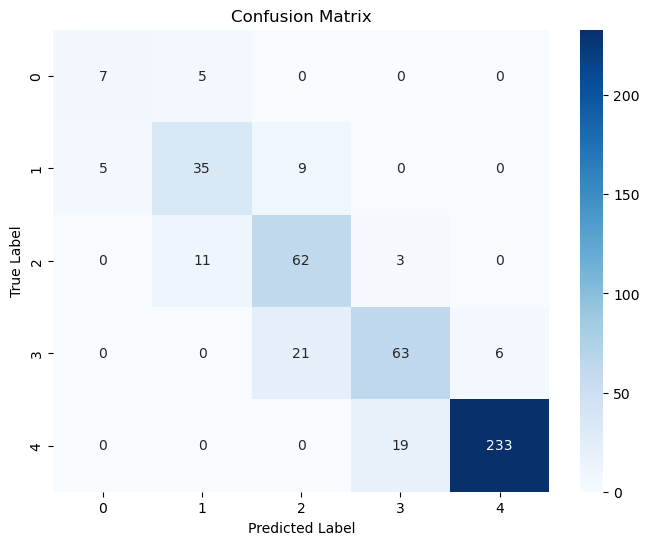

In [46]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print(classification_report(y_true_classes, y_pred_classes))
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Conclusion 
- what the data showed us 
- best model 
- suggestions and recommendations  moving forward